In [25]:
# Load the required libraries
library(cluster)
library(ggplot2)



In [26]:
# Read the Framingham dataset
df <- read.csv("framingham.csv")

In [27]:
df

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110.0,30.30,77,99,0
0,63,1,0,0,0,0,0,0,205,138.0,71.0,33.11,60,85,1
0,45,2,1,20,0,0,0,0,313,100.0,71.0,21.68,79,78,0
1,52,1,0,0,0,0,1,0,260,141.5,89.0,26.36,76,79,0


In [28]:
# Select the relevant columns
data <- df[c("male", "age")]

In [29]:

# Standardize the 'age' column
data$age <- scale(data$age)

In [30]:
print(data)

     male         age
1       1 -1.23413741
2       0 -0.41761493
3       1 -0.18432280
4       0  1.33207609
5       0 -0.41761493
6       0 -0.76755314
7       0  1.56536823
8       0 -0.53426100
9       1  0.28226148
10      1 -0.76755314
11      0  0.04896934
12      0 -0.76755314
13      1 -0.41761493
14      0 -1.00084528
15      0 -1.23413741
16      0 -1.35078348
17      1 -0.18432280
18      0 -0.41761493
19      0 -1.35078348
20      1 -1.00084528
21      0 -0.88419921
22      0 -0.76755314
23      0  0.28226148
24      0  0.28226148
25      1 -0.65090707
26      1 -0.30096887
27      0  1.21543002
28      1 -1.70072169
29      0  1.33207609
30      0  1.21543002
31      1 -1.58407562
32      1 -0.76755314
33      0  1.09878396
34      1  1.33207609
35      1  0.51555361
36      1 -1.46742955
37      1  0.74884575
38      1  0.28226148
39      0 -0.88419921
40      1 -1.58407562
41      0 -0.76755314
42      0 -1.00084528
43      0  0.28226148
44      1  0.51555361
45      0 

##**(1) Perform k‐means clustering on the selected attributes(age and sex)**

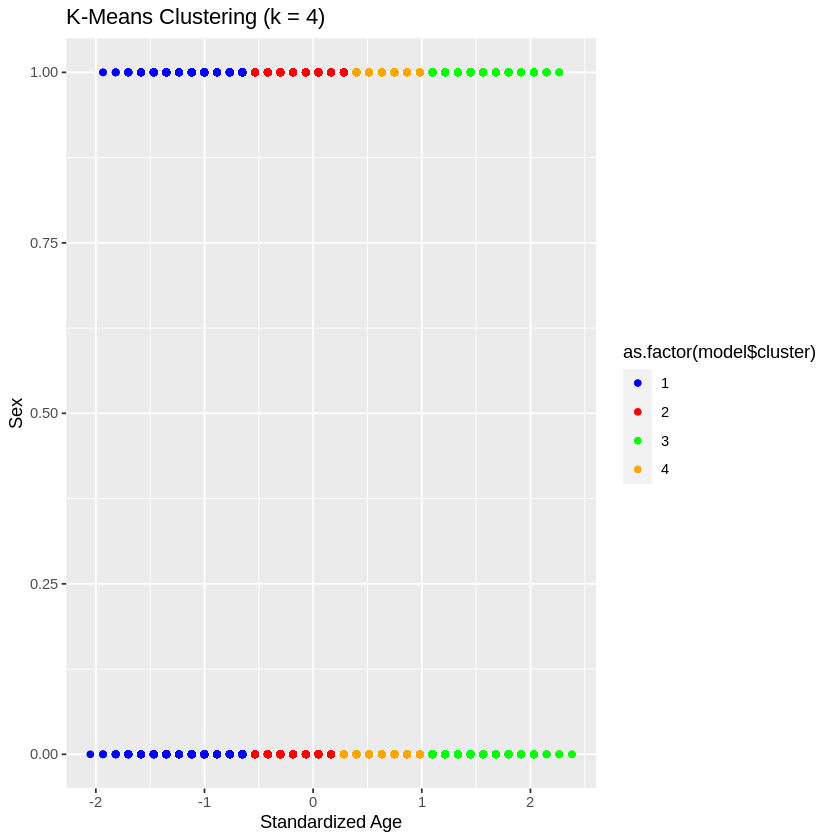

In [31]:
set.seed(123)

# Train the K-means model
model <- kmeans(data, centers = 4)

# Plot the K-Means clusters
ggplot(data, aes(x = age, y = male, color = as.factor(model$cluster))) +
  geom_point() +
  labs(x = "Standardized Age", y = "Sex") +
  scale_color_manual(values = c("blue", "red", "green", "orange")) +
  ggtitle("K-Means Clustering (k = 4)")

##**(2) Apply the elbow method**

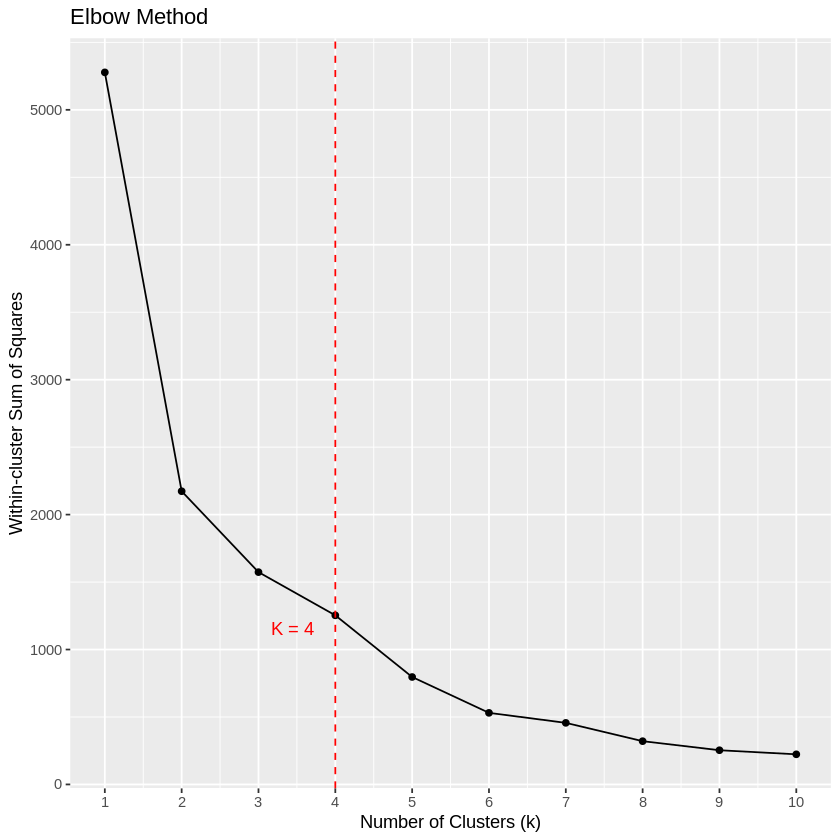

In [32]:
library(ggplot2)

# Initialize an empty vector to store the within-cluster sum of squares
wss <- c()

# Apply K-Means clustering for different values of k and calculate the within-cluster sum of squares
for (k in 1:10) {
  kmeans_model <- kmeans(data[c("male", "age")], centers = k)
  wss[k] <- kmeans_model$tot.withinss
}

# Find the optimal value for K (elbow point)
diff_wss <- diff(wss)
elbow_point <- which(diff(diff_wss) <= 0)[1] + 1

# Plot the within-cluster sum of squares versus the number of clusters (k)
ggplot(data.frame(k = as.integer(1:10), wss), aes(x = k, y = wss)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(breaks = 1:10, labels = as.character(1:10)) +
  labs(x = "Number of Clusters (k)", y = "Within-cluster Sum of Squares") +
  ggtitle("Elbow Method") +
  geom_vline(xintercept = elbow_point, linetype = "dashed", color = "red") +
  annotate("text", x = elbow_point, y = wss[elbow_point], label = paste("K =", elbow_point),
           vjust = 1.5, hjust = 1.5, color = "red")


##**(3) Evaluate the quality of the clusters using the Silhouette Coefficient method**


In [33]:
# Calculate the Silhouette Coefficient
silhouette_avg <- silhouette(kmeans_model$cluster, dist(data[c("male", "age")]))
mean_silhouette <- mean(silhouette_avg[, "sil_width"])

# Print the average Silhouette Coefficient
cat("Average Silhouette Coefficient:", mean_silhouette, "\n")

Average Silhouette Coefficient: 0.5472982 
